# Data visualisation with `matplotlib`

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
countries = pd.read_csv('datasets/wdi-countries.csv')
wdi = pd.read_csv('datasets/wdi-data-subset.csv')

In [3]:
countries.head()

,country_code,country_name,region,income_group
0,ABW,Aruba,Latin America & Caribbean,High income
1,AFG,Afghanistan,South Asia,Low income
2,AGO,Angola,Sub-Saharan Africa,Lower middle income
3,ALB,Albania,Europe & Central Asia,Upper middle income
4,AND,Andorra,Europe & Central Asia,High income


In [4]:
wdi.head()

,country_code,indicator_code,year,value
0,ABW,NY.GNP.PCAP.CD,1988,10360.0
1,ABW,NY.GNP.PCAP.CD,1989,11760.0
2,ABW,NY.GNP.PCAP.CD,1990,12230.0
3,ABW,NY.GNP.PCAP.CD,1991,13190.0
4,ABW,NY.GNP.PCAP.CD,1992,14000.0


In [5]:
indicators = {
    'NY.GNP.PCAP.CD': 'gni_per_capita',  # GNI per capita, Atlas method (current US$)
    'SP.DYN.IMRT.IN': 'infant_mort',     # Mortality rate, infant (per 1,000 live births)
    'SP.DYN.LE00.IN': 'life_exp'         # Life expectancy at birth, total (years)
}

wdi['indicator_code'].replace(indicators, inplace=True)

In [7]:
wdi.head()

,country_code,indicator_code,year,value
0,ABW,gni_per_capita,1988,10360.0
1,ABW,gni_per_capita,1989,11760.0
2,ABW,gni_per_capita,1990,12230.0
3,ABW,gni_per_capita,1991,13190.0
4,ABW,gni_per_capita,1992,14000.0


In [8]:
wdi_2016 = wdi[wdi['year'] == 2016]\
           .drop(columns=['year'])\
           .pivot(index='country_code', columns='indicator_code', values='value')\
           .dropna()

In [10]:
wdi_2016.head()

indicator_code,gni_per_capita,infant_mort,life_exp
country_code,,,
AFG,570.0,53.2,63.673
AGO,3770.0,55.8,61.547
ALB,4320.0,8.1,78.345
ARE,40950.0,7.7,77.256
ARG,12150.0,9.7,76.577


In [11]:
wdi_2016 = pd.merge(wdi_2016, countries, left_index=True, right_on='country_code')

In [12]:
wdi_2016.head()

,gni_per_capita,infant_mort,life_exp,country_code,country_name,region,income_group
1,570.0,53.2,63.673,AFG,Afghanistan,South Asia,Low income
2,3770.0,55.8,61.547,AGO,Angola,Sub-Saharan Africa,Lower middle income
3,4320.0,8.1,78.345,ALB,Albania,Europe & Central Asia,Upper middle income
5,40950.0,7.7,77.256,ARE,United Arab Emirates,Middle East & North Africa,High income
6,12150.0,9.7,76.577,ARG,Argentina,Latin America & Caribbean,High income


## Histograms and density plots

**Usage**: show the distribution of a numerical variable.

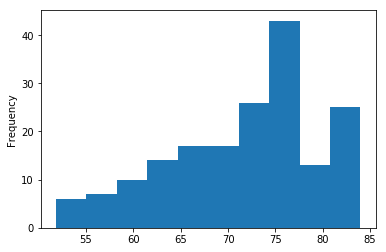

In [14]:
wdi_2016['life_exp'].plot.hist()

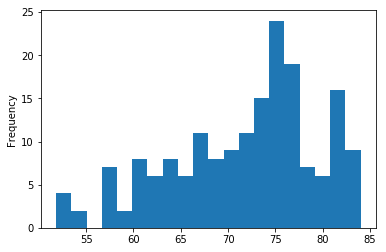

In [18]:
# Try changing the number of bins
wdi_2016['life_exp'].plot.hist(20)

Text(0, 0.5, 'Frequency')

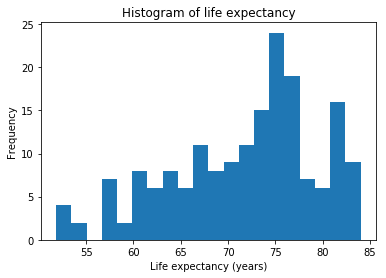

In [19]:
# Add title and labels
wdi_2016['life_exp'].plot.hist(20, title='Histogram of life expectancy')
plt.xlabel('Life expectancy (years)')
plt.ylabel('Frequency')

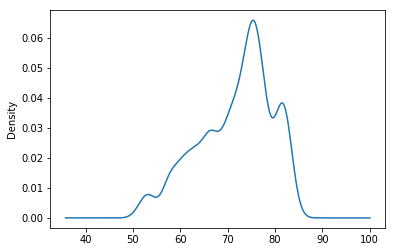

In [22]:
# Compare with the corresponding density plot
wdi_2016['life_exp'].plot.density(0.2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020824443828>,
      dtype=object)

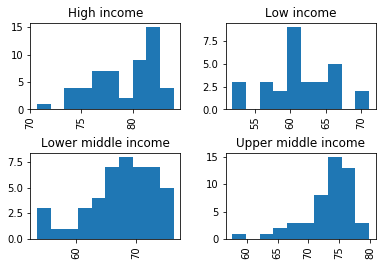

In [23]:
# Grouped histograms
wdi_2016.hist(column='life_exp', by='income_group')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002082455F080>,
      dtype=object)

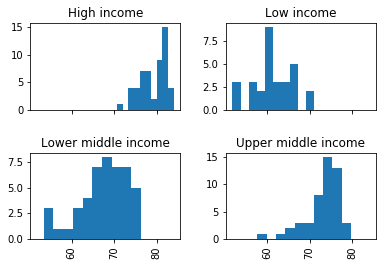

In [24]:
# Grouped histograms with shared x-axis
wdi_2016.hist(column='life_exp', by='income_group', sharex=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020825760780>,
      dtype=object)

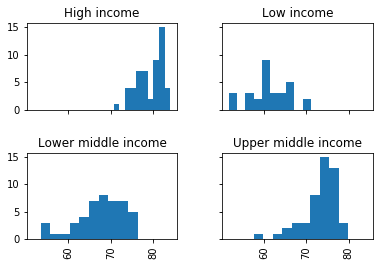

In [25]:
# Grouped histograms with shared x- and y-axes
wdi_2016.hist(column='life_exp', by='income_group', sharex=True, sharey=True)

## Scatter plots

**Usage**: show the relationship between two (or pairs of) numerical variables.

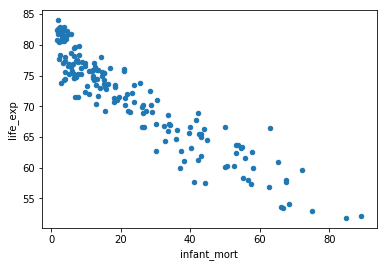

In [26]:
wdi_2016.plot.scatter(x='infant_mort', y='life_exp')

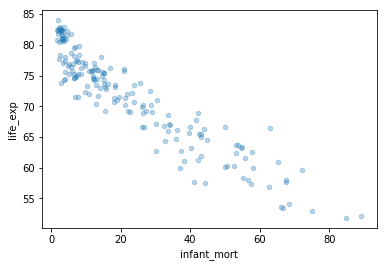

In [27]:
# Add transparency
wdi_2016.plot.scatter(x='infant_mort', y='life_exp', alpha=0.3)

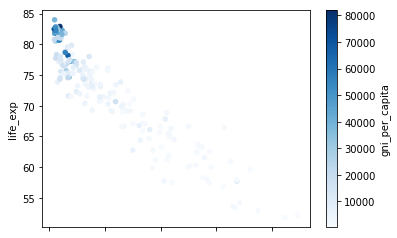

In [28]:
# Vary point colour by GNI per capita
wdi_2016.plot.scatter(x='infant_mort', y='life_exp', c='gni_per_capita', colormap='Blues')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020825AB51D0>,
      dtype=object)

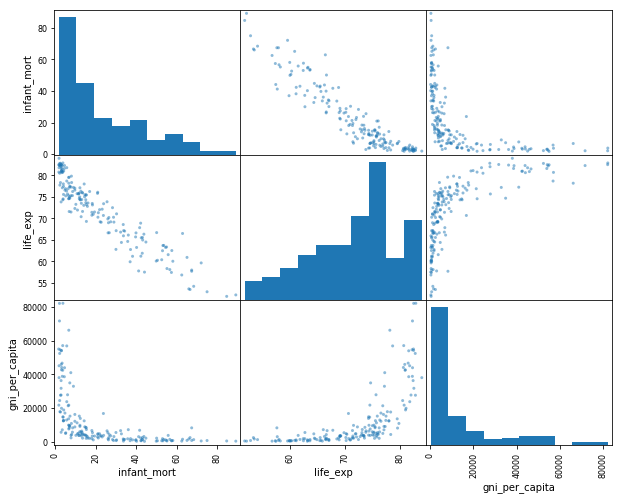

In [29]:
# Scatter matrix of three (numerical) variables
pd.plotting.scatter_matrix(wdi_2016[['infant_mort', 'life_exp', 'gni_per_capita']], figsize=(10, 8))

## Bar plots

**Usage**: show a numerical comparison across categories.

In [30]:
# Compute average life expectancy and infant mortality for each country group
wdi_2016.groupby('income_group')[['life_exp', 'infant_mort']].mean()

,life_exp,infant_mort
income_group,,
High income,79.312010,5.124528
Low income,61.412200,51.433333
Lower middle income,67.893208,31.845652
Upper middle income,73.235949,16.224490


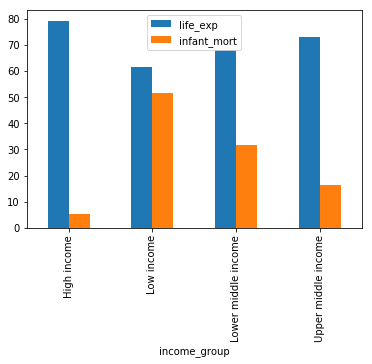

In [31]:
# Plot side-by-side
wdi_2016.groupby('income_group')[['life_exp', 'infant_mort']].mean().plot.bar()

## Box plots

**Usage**: show quartiles (and outliers) for numerical variables (also across categories).

In [32]:
# Five-number summary (min, Q1, Q2 [median], Q3, max)
wdi_2016['life_exp'].describe()

count    178.000000
mean      71.671638
std        7.755259
min       51.835000
25%       66.513750
50%       73.492500
75%       77.094250
max       83.984878
Name: life_exp, dtype: float64

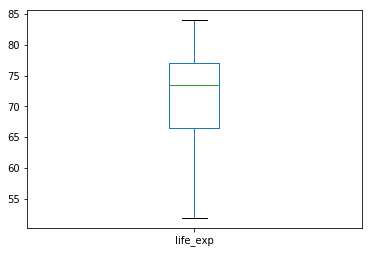

In [33]:
# Compare with box plot
wdi_2016['life_exp'].plot.box()

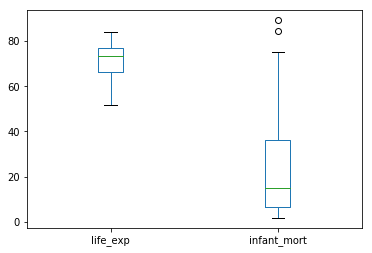

In [34]:
# Include multiple variables
wdi_2016[['life_exp', 'infant_mort']].plot.box()

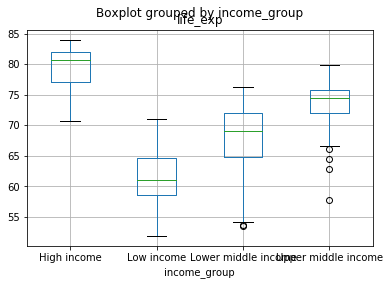

In [35]:
# Grouped box plots
wdi_2016.boxplot('life_exp', by='income_group')

## Line plots

**Usage**: show the trend of a numerical variable over time (don't use when there's no logical ordering!).

In [36]:
uk_life_exp = wdi[(wdi['country_code'] == 'GBR') & (wdi['indicator_code'] == 'life_exp')]

In [37]:
uk_life_exp.head()

,country_code,indicator_code,year,value
9416,GBR,life_exp,1960,71.126829
9417,GBR,life_exp,1961,70.878049
9418,GBR,life_exp,1962,70.926829
9419,GBR,life_exp,1963,70.826829
9420,GBR,life_exp,1964,71.624390


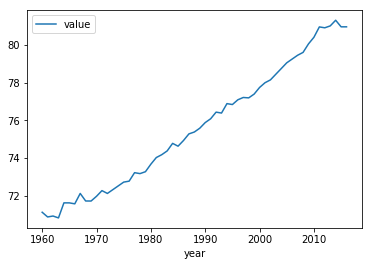

In [38]:
uk_life_exp.plot.line(x='year', y='value')